In [1]:
import random
import math

import pandas as pd
import numpy as np

In [2]:
np.random.normal()

-2.5711157077084184

In [70]:
pd.Series([np.random.normal() for i in range(10)]).describe()

count    10.000000
mean      0.150957
std       0.576165
min      -0.931168
25%       0.001209
50%       0.190569
75%       0.433301
max       1.086014
dtype: float64

In [3]:
random.uniform(10, 20)

16.68877902660432

<AxesSubplot:>

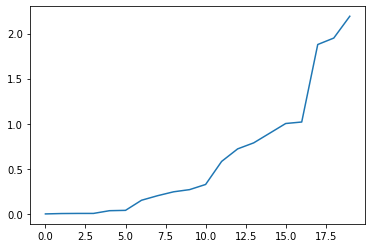

In [32]:
ddv = [abs(np.random.normal()) for i in range(20)]
sig = pd.Series(sorted([dd * dd for dd in ddv]))
sig.plot()

In [43]:
def gen_d(k):
    ddv = [abs(np.random.normal()) for i in range(k)]
    a = random.uniform(10, 40)
    b = math.sqrt(sum([dd * dd for dd in ddv]))
    p = a / b
    
    return [round(p * dd) for dd in ddv]

In [44]:
gen_d(10), gen_d(20)  # k が大きくなるほどそれぞれの値は小さくなる

([24, 13, 4, 1, 1, 11, 15, 11, 5, 10],
 [9, 5, 4, 1, 10, 13, 2, 2, 3, 1, 14, 4, 3, 1, 0, 9, 0, 4, 4, 0])

In [51]:
sum_10 = []
sum_20 = []
for i in range(1000):
    sum_10.append(sum(gen_d(10)))
    sum_20.append(sum(gen_d(20)))

pd.Series(sum_10).describe(), pd.Series(sum_20).describe()

(count    1000.000000
 mean       64.543000
 std        23.406709
 min        22.000000
 25%        43.750000
 50%        65.000000
 75%        84.000000
 max       112.000000
 dtype: float64,
 count    1000.000000
 mean       90.540000
 std        31.345892
 min        33.000000
 25%        63.000000
 50%        92.000000
 75%       118.000000
 max       156.000000
 dtype: float64)

In [52]:
def gen_s(k):
    sdv = [abs(np.random.normal()) for i in range(k)]
    a = random.uniform(20, 60)
    b = math.sqrt(sum([sd * sd for sd in sdv]))
    q = a / b
    
    return [round(q * sd) for sd in sdv]

In [53]:
sum_10 = []
sum_20 = []
for i in range(1000):
    sum_10.append(sum(gen_s(10)))
    sum_20.append(sum(gen_s(20)))

pd.Series(sum_10).describe(), pd.Series(sum_20).describe()

(count    1000.000000
 mean      103.830000
 std        30.836309
 min        44.000000
 25%        78.000000
 50%       103.000000
 75%       128.000000
 max       177.000000
 dtype: float64,
 count    1000.000000
 mean      143.562000
 std        41.686015
 min        61.000000
 25%       110.000000
 50%       142.500000
 75%       178.000000
 max       243.000000
 dtype: float64)

<AxesSubplot:>

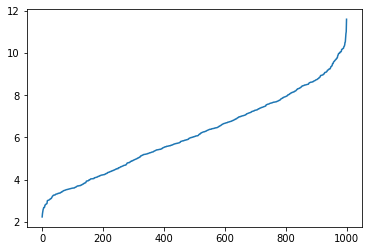

In [78]:
std_15 = []
for i in range(1000):
    std_15.append(pd.Series(gen_s(15)).std())

pd.Series(sorted(std_15)).plot()

<AxesSubplot:>

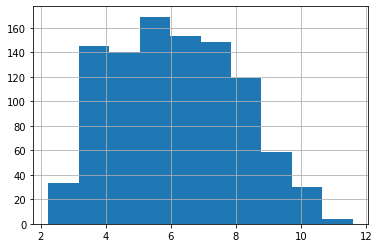

In [87]:
pd.Series(std_15).hist(bins=1 + int(math.log2(len(std_15))))

In [114]:
def stand(a):
    a = pd.Series(a)
    return round((a - a.mean()) / a.std(), 1)

In [115]:
stand([1, 2, 3, 4, 5, 6, 7])

0   -1.4
1   -0.9
2   -0.5
3    0.0
4    0.5
5    0.9
6    1.4
dtype: float64

In [117]:
for i in range(10):
    d = gen_d(15)
    print(sorted(d))
    print(sorted(stand(d)))

[1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5]
[-1.4, -1.4, -1.4, -0.6, -0.6, -0.6, 0.1, 0.1, 0.1, 0.1, 0.8, 0.8, 0.8, 1.6, 1.6]
[0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5]
[-1.3, -1.3, -0.7, -0.7, -0.7, -0.7, -0.2, -0.2, -0.2, -0.2, 0.4, 1.0, 1.6, 1.6, 1.6]
[1, 1, 2, 2, 2, 2, 3, 5, 6, 8, 9, 9, 10, 10, 11]
[-1.2, -1.2, -0.9, -0.9, -0.9, -0.9, -0.6, -0.1, 0.2, 0.7, 1.0, 1.0, 1.2, 1.2, 1.5]
[1, 3, 3, 4, 4, 6, 9, 9, 9, 11, 11, 13, 15, 16, 19]
[-1.5, -1.1, -1.1, -0.9, -0.9, -0.5, 0.0, 0.0, 0.0, 0.4, 0.4, 0.8, 1.1, 1.3, 1.9]
[2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 10, 11, 12, 14, 18]
[-1.3, -1.1, -0.8, -0.8, -0.6, -0.6, -0.4, -0.2, -0.2, 0.1, 0.5, 0.7, 1.0, 1.4, 2.3]
[1, 1, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 8, 10, 19]
[-1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.3, -0.3, -0.3, -0.1, -0.1, 0.2, 0.6, 1.1, 3.1]
[0, 1, 2, 3, 4, 4, 4, 5, 8, 9, 10, 11, 11, 12, 17]
[-1.4, -1.2, -1.0, -0.8, -0.6, -0.6, -0.6, -0.4, 0.3, 0.5, 0.7, 0.9, 0.9, 1.1, 2.1]
[1, 1, 1, 1, 3, 5, 7, 7, 8, 9, 10, 12, 14, 14, 24]
[-1.1, -1.1, -1.